# Linear regression with confidence interval
This notebook shows a working example of a linear curve fitting model with confidence interval

**Objectives:**
- Try to fit a linear line to the given dataset
- Estimate the confidence interval( input by user)
- Plot the results

##### Import required modules

In [33]:
#curve fitting and confidence interval
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as t

##### Create the functions

In [34]:
# Definition of a linear eqation y=ax+b
def lineq(x,a,b):
    return a*x+b

#calculating values of a and b
def fitter(X,Y):
    xm=np.mean(X)
    ym=np.mean(Y)
    A=np.sum((xm-X)*(ym-Y))/np.sum((xm-X)**2)
    B=ym-A*xm
    y=lineq(X,A,B)
    return y

#confidence interval
def confidence_interval(X,Y,confidence=90):
    N=confidence
    df=len(X)-2 #degree of freedom
    alpha=(1-N/100)
    crit=t.t.ppf(1-alpha/2,df) #critical t value
    dev=np.std(Y)
    residuals=Y-y
    s_err=np.sqrt(np.sum((residuals/error)**2)/df) #standard error
    margin=crit*s_err
    ylow=Y-margin*np.ones(len(Y)) #confidence interval
    yup=Y+margin*np.ones(len(Y))
    return ylow,yup

#plotting datasets
def plotting(X,Y,y,ylow,yup,error,color='lightblue'):
    plt.plot(X,y,'r',label='Fitted line')
    plt.scatter(X,Y,label='Observed')
    plt.errorbar(X,Y,yerr=error,fmt='o',label='Errors')
    plt.fill_between(X,ylow,yup,color='lightblue',alpha=.4,label='Confidence interval')
    plt.legend()
    plt.grid()
    plt.show()

##### Use dataset

In [35]:
X=np.arange(1,11,1)
Y=np.array([2.1,4.0,5.9,8.2,10.1,12.0,14.7,16.3,18.1,21])
error=np.array([.2,.3,.2,.4,.3,.1,.4,.5,.2,.7])

##### Call the functions and generate the output

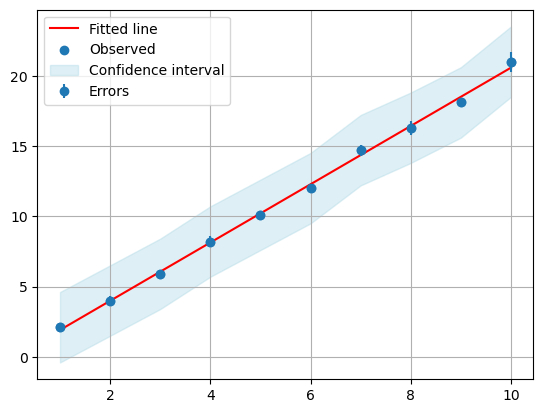

In [36]:
y=fitter(X,Y)
ylow,yup=confidence_interval(X,Y,90)
plotting(X,Y,y,ylow,yup,error)

##### Conclusion
1. The orange line is the fitted linear curve generated in accordance to the given dataset.
2. The scatter plot( blue dots) show the observed data points with their corresponding errors( shown in errorbar)
3. The shaded region represents the confidence interval, calculated using t-values.

## Adherence to FAIR data principles

1. **Findable:** The repository has README, keywords and metadata(environment.yml file).
2. **Accessible:** The license allows for authentication and authorisation of users wanting to use the data in the future.
3. **Interoperable:** This workflow uses Python, which is an open source software, alongwith libraries like NumPy, Matplotlib.
4. **Reusable:** The workflow is in the form of functions which can be implemented on other datasets as well.